<h1>MALIS Lab Session 2 - Fall 2019</h1>
November 12, 2019

The aim of this lab is to practice with Neural Networks (Multi-Layer Perceptrons) via simple classification experiments and the (partial) implementation of the feedforward and backpropagation procedures. For this lab, the implementation of the MLP simulator is in Python 3.

#### Learning goals
After this lab, you should be able to:
1. Be familiar with the elements required to define the architecture of a neural network (NN).
2. Understand the two procedures needed to train a neural network: feedforward and backpropagation
3. Understand the role of the learning rate and the number of iterations in the training process of a NN and how it these can affect performance.

#### Instructions:
Experiments should be made by groups of two students. Each group should produce a Jupyter Notebook with all their results and comments. We strongly encourage the addition of plots and visual representation to the report, bearing in mind that comments on the graphical data are still necessary. Code for adding images to your notebook: ```<img src="path/to/image.png" />```. <Plateforme soumission des notebooks>

**Submission deadline**: Nov. 18 23.59 (submision via Moodle)

<h2>Introduction</h2>
There are three parts to this lab session. 

1. A "theoretical" part: Given a set of training examples you have to decide on the architecture of the feed-forward neural network such as; number of layers, number of neuron per layers and finally the values of the weights. 

2. A "programming" part: Given the skeleton of the Python code of an MLP simulator, implement the missing functions (feedforward and backpropagation procedures). 

3. An "experimental" part: Having completed the implementation of the MLP simulator, the final step consist on training the network and testing it.

<h2>Part 1: Design a neural network</h2>
The aim of this part is to get a better understanding of the basics of Neural Networks construction. A number of sample points on a 128 by 128 grid have been assigned one out of three colors (red, green or blue). You should build a Neural Network with two inputs and three outputs which provides the exact coloring for these points. The problem can be visualized in the following figure: 

<img src="images/data_set.jpg" />

The file set30.x1x2rgb (in .\data\) contains the data corresponding to the problem defined above. The visual representation of the problem (above figure) is stored in data_set.jpg.

The problem:

Pairs of x1 and x2 coordinates (both ranging between 0 and 127) are associated with a specific color: 

* Red: output 1 0 0, 
* Green: output 0 1 0, 
* Blue: output 0 0 1. 

The objective of the network is to correctly determine for any given (x1, x2) coordinate pair the corresponding color. 
Your task is to <b>manually define a Neural Network which performs this task perfectly</b>. There is no need for programming or iterative training. The transfer function is assumed to be the step function: 

$f(t) = (t > 0)$ (it is equal to 1 if t is positive, 0 otherwise). 

Of course, it is your task to define the number of layers, the number of neurons per layer, and the exact values for the weights. 

<i>Hint: We may remember the XOR problem and how it was solved.</i>

<h3>Your answer:</h3>

### Design

At the beginning, let's plot two lines $(Y_1)$ and $(Y_2)$ to separate the different classes.

In order to solve this problem, we can suggest this architecture: a Neural Network containing **one hidden layer** with **two neurons**: the first one gives an output equal to $0$ or $1$ to know wether the point is at the **bottom** (0) or **top** (1) of $(Y_1)$, and the second one gives an output equal to $0$ or $1$ to know wether the point is on the **left** (0) or **right** (1) of $(Y_2)$.<br>

The output of the network is a tuple representing the point color: **001** for blue, **010** for green and **100** for red. So the output layer contains **3 neurons**: one for each output digit.<br><br>
This table gives us the different network outputs depending on the hidden layer outputs.

| y1 | y2 | c1 | c2 | c3 | color |
|----|----|----|----|----|-------|
| 0  | 0  | 1  | 0  | 0  | red   |
| 0  | 1  | 1  | 0  | 0  | red   |
| 1  | 0  | 0  | 1  | 0  | green |
| 1  | 1  | 0  | 0  | 1  | blue  |

<img src="images/data_set_split.jpg" />

##### Hidden layer
----------------
For this layer, we will use a graphic method to determine the layer weights. We can easily get the following equation of $(Y_1)$ and $(Y_2)$:<br>
$(Y_1): w_{11}x_1+w_{12}x_2+w_{10}=0$<br>
$(Y_2): w_{21}x_1+w_{22}x_2+w_{20}=0$<br><br>
Which gives, when choosing two points on each line and solve a simple linear system:<br>
$(Y_1): 3x_1+5x_2-375=0$<br>
$(Y_2): 3x_1+-2x_2-60=0$<br><br>
Finally<br>
$w_{11}=+3$<br>
$w_{12}=+5$<br>
$w_{10}=-375$<br><br>
$w_{21}=+3$<br>
$w_{22}=-2$<br>
$w_{20}=-60$<br><br>

##### Output layer
----------------
The first step is to define the output layer weights. Since there are $3$ output neurons and $2$ neurons in the previous layer, there are $9$ weights to define ($2$ weights and $1$ bias for each output neuron): $w_{ij}, (i,j)\in\{1,2,3\}\times\{0,1,2\}$.

**Neuron 1**<br>
$f(w_{11}y_1+w_{12}y_2+w_{10})$<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;w_{10}\geq0$<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;w_{12}\;\;+w_{10}\geq0$<br>
$\;\;\;w_{11}\;\;\;\;\;\;\;\;\;\;\;\;\;\;+w_{10}<0$<br>
$\;\;\;w_{11}\;\;\;+w_{12}\;\;+w_{10}<0$<br><br>
$w_{11}=-3$<br>
$w_{12}=+1$<br>
$w_{10}=+1$<br><br>

**Neuron 2**<br>
$f(w_{21}y_1+w_{22}y_2+w_{20})$<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;w_{20}<0$<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;w_{22}\;\;+w_{20}<0$<br>
$\;\;\;w_{21}\;\;\;\;\;\;\;\;\;\;\;\;\;\;+w_{20}\geq0$<br>
$\;\;\;w_{21}\;\;\;+w_{22}\;\;+w_{20}<0$<br><br>
$w_{21}=+2$<br>
$w_{22}=-2$<br>
$w_{20}=-1$<br><br>

**Neuron 3**<br>
$f(w_{31}y_1+w_{32}y_2+w_{30})$<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;w_{30}<0$<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;w_{32}\;\;+w_{30}<0$<br>
$\;\;\;w_{31}\;\;\;\;\;\;\;\;\;\;\;\;\;\;+w_{30}<0$<br>
$\;\;\;w_{31}\;\;\;+w_{32}\;\;+w_{30}\geq0$<br><br>
$w_{31}=+2$<br>
$w_{32}=+2$<br>
$w_{30}=-3$<br><br>

### Verification (bonus)
To make sure that the designed model works perfectly, we can try to apply it on the given set of data ```set30.x1x2rgb```.

In [1]:
import numpy as np

In [2]:
# Hidden Layer Weights
w_1_1 = np.array([3, 5, -375])
w_1_2 = np.array([3, -2, -60])

# Output layer Weights
w_2_1 = np.array([-3, 1, 1])
w_2_2 = np.array([2, -2, -1])
w_2_3 = np.array([2, 2, -3])

In [3]:
f = lambda x: 1 if x>0 else 0 # Transfer function
with open('data/set30.x1x2rgb','r') as file:
    lines = file.readlines()[1:]
s = 0          # Correctly classified points
n = len(lines) # All points
for line in lines:
    l= list(map(int,line.split()))
    X = np.array(l[0:2]+[1])                                           # Add dummy coefficient to X
    z = np.array(list(map(f, [X.dot(w_1_1), X.dot(w_1_2)])) + [1])     # Calculate activation, apply f and add dummy coef
    c = np.array(list(map(f,list(map(z.dot, [w_2_1, w_2_2, w_2_3]))))) # Calculate last layer activations and apply f
    r = np.array(l[2:]) # Labeled color
    s += 1 if c.all()==r.all() else 0
print('======================')
print('| Accuracy =',100*s/n,'% |')
print('======================')

| Accuracy = 100.0 % |


<h2>Part 2: Implementation of the MLP simulator</h2>
The task here is to implement the missing parts of a code written to simulate multi-layer perceptrons. The code can be found in your directory under the filename utils.py (but you will not edit that file, all your code will be written in your notebook). Here is a brief explanation about the MLP simulator: 

A network description file has to be provided. This is a text file which contains information about the number of layers in the network and the number of units (neuron) for each layer. Here is an example of such a file: 

This example describes a 2 layer network with 2 hidden units and 3 output units. 
Additionally a pattern (or example set) file has to be provided. This file contains a number of example pattern with input and output values. For an example of such a file look at ./data/set30.x1x2rgb.

As you know, activation functions of an MLP need to be differentiable to train it. Therefore, we replace the step function by a sigmoid function.

Now that you have a broad overview of the program your task is to <b>implement the feedforward function of the Neuron class</b>. Obviously, you can find help in the notes from the course.

In [1]:
# First run this cell to import relevant classes and functions
from utils import Neuron, Dataset, Layer, MLP, sigmoid, d_sigmoid

<h3>Your answer:</h3>

In [2]:
def feedforward(self):
    res = 0.
    for i in range(len(self.inputs)):
        res += self.inputs[i] * self.weights[i]
    res += self.bias
    self.u = res
    self.out = sigmoid(res)

Neuron.feedforward = feedforward

Before implementing the Backpropagation function, <b>write the recursive formula for the partial derivative of the error with respect to the activation (neuron j of layer i) as a function of the weights and partial derivative of the error in layer i+1 from the course material</b>.

<h3>Your answer:</h3>

For the output unit:
$$\frac{\partial L}{\partial a^{(L)}_k} = \quad 2\times(z^{(L)}_{k}-y_k) \times \sigma^{'}(a^{(L)}_k) $$
For hidden layers:
$$\frac{\partial L}{\partial a^{(i)}_j} = \quad \sigma^{'}(a^{(i)}_j) \sum_{k}{w^{(i+1)}_{kj} \frac{\partial L}{\partial a^{(i+1)}_k}}$$

Now, <b>implement the compute_gradients() and the apply_gradient() functions of the MLP class</b>.

<h3>Your answer:</h3>

In [3]:
def compute_gradients(self):
    # First compute derivatives for the last layer
    layer = self.layers[-1]
    for i in range(len(layer)):
        # Compute dL/du_i
        neuron = layer.neurons[i]
        o = neuron.out
        u = neuron.u
        t = self.gt[i]
        neuron.d_u = 2 * ( o - t ) * d_sigmoid(u) # Calculate the error function (o or sigmoid(u)?)
        for j in range(len(neuron.weights)):
            # Compute dL/dw_ji
            neuron.d_weights[j] = neuron.d_u * neuron.inputs[j]

    # Then compute derivatives for other layers
    for l in range(2, len(self.layers)):
        layer = self.layers[-l]
        next_layer = self.layers[-l+1]
        for i in range(len(layer)):
            # Compute dL/du_i
            neuron = layer.neurons[i]
            d_u = 0.
            u = neuron.u
            for j in range(len(next_layer)):
                d_u += d_sigmoid(u) * next_layer.neurons[j].weights[i] * next_layer.neurons[j].d_u #OK
            neuron.d_u = d_u
            for j in range(len(neuron.weights)):
                # Compute dL/dw_ji
                neuron.d_weights[j] = neuron.d_u * neuron.inputs[j]

def apply_gradients(self, learning_rate):
    # Change weights according to computed gradients
    for i in range(1, len(self.layers)):
        layer = self.layers[i]
        for j in range(1, len(layer)):
            neuron = layer.neurons[j]
            for k in range(len(neuron.d_weights)):
                neuron.weights[k] -= learning_rate * neuron.d_weights[k]
            neuron.bias -= learning_rate * neuron.d_u

MLP.compute_gradients = compute_gradients
MLP.apply_gradients = apply_gradients

<h2>Part 3: Training and Recall experiments</h2>

Train the network on the problem stated in Part 1, using the training set set120.x1x2rgb and the following parameters:
* learning rate: 2.0; 
* number of training cycles: 1000

In order to do so you will need to create a network definition file (as described in the introduction) containing the details of the network architecture. 
Evaluate the accuracy using set30.x1x2rgb as the test set (you can use the setdataset() function of the MLP class to change between training and test sets).

Experiment with the learning rate and the number of training cycles. What do you notice?

<h3>Your answer:</h3>

In [4]:
train_datafile = "data/set120.x1x2rgb"
train_data = Dataset(train_datafile)

test_datafile = "data/set30.x1x2rgb"
test_data = Dataset(test_datafile)

nnfile = "data/NN.dat"
mlp = MLP(nnfile, train_data, print_step=100, verbose=1)

In [17]:
mlp.layers[-1]

In [ ]:
mlp.train(1000, 2)
mlp.make_plot()

print("=== Result on test data ===")
mlp.setdataset(test_data)
mlp.print_accuracy()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

0 .. 5
5 .. 10
10 .. 15
15 .. 20


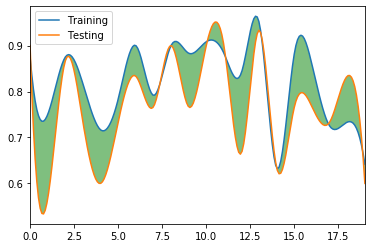

In [9]:
train_datafile = "data/set120.x1x2rgb"
train_data = Dataset(train_datafile)

test_datafile = "data/set30.x1x2rgb"
test_data = Dataset(test_datafile)

nnfile = "data/NN.dat"

tr_a = list() # Training accuracies
te_a = list() # Testing accuracies

N = 20
x = np.array(range(N))
xnew = np.linspace(x.min(), x.max(), 10*N) 

for i in range(N):
    if not i%5:
        print(i,"..",i+5)
        
    mlp2 = MLP(nnfile, train_data, print_step=100, verbose=0) # Create an MLP instance
    mlp2.train(1000, 2)

    mlp2.setdataset(test_data)
    mlp2.compute_accuracy()
    tr_a.append(mlp2.plot[-2]) # Taking the last training accuracy
    te_a.append(mlp2.plot[-1])

# plt.figure(figsize=(16,8))

# This part to smooth the graph
tr = make_interp_spline(x, tr_a, k=3)
tr_a = tr(xnew)
te = make_interp_spline(x, te_a, k=3)
te_a = te(xnew)

plt.plot(xnew,tr_a)
plt.plot(xnew,te_a)
plt.legend(['Training', 'Testing'])
plt.fill_between(xnew, tr_a, te_a, facecolor='green', alpha=0.5)
plt.xlim(0, N-1)
plt.show()

<h3>Your comments</h3>

##### Training and Testing Accuracies
---
For different executions of the training processes, we get different accuracy values and this is due to the initial values of the weights (which are totally random): different initial weights give different models (final weights).<br>
As expected, the test accuracy is worse than the training one but it's still acceptable.<br>
<img src="images/test_vs_train_acc.png"/>

##### Learning Rate and Training Cycles
---
Those are very important parameters in training data: the learning rate describes the amount that the weights are updated during one training step. A very small learning rate gives smaller changes and less quicker adaptation, so we need more cycles to train data. A bigger learning rate results in quicker changes so we need fewer training cycles.<br>
<img src="images/lr001epch1000.png" align="left"/><img src="images/lr001epch5000.png" align="right"/><br>

As we can see, when choosing a value of $0.01$ for the learning rate, a training cycle of $1000$ was not enough to get satisfying results. We had to use more epoches in order to get an accuracy of nearly $100\%$.
<img src="images/lr2epch1000.png"/>
On the other hand, for a learning rate equal to $2$, we can quickly reach great accuracy values and also we can easily lose those solutions: for exemple we had an accuracy of $87\%$ after reaching about $95\%$.

##### Decay
---
To avoid this problem, we can use a decay value slightly less thatn $1$: that means after training each epoche, the learning rate is slightly reduced. The advantage of doing so is that we start with an important learning rate value so the model is quickly trained at the beginning, and then adapts small changes to avoid overfitting (next figure).

```python
train_datafile = "data/set120.x1x2rgb"
train_data = Dataset(train_datafile)

test_datafile = "data/set30.x1x2rgb"
test_data = Dataset(test_datafile)

nnfile = "data/NN.dat"
mlp2 = MLP(nnfile, train_data, print_step=100, verbose=0)

mlp2.train(2000, 2, 0.999)
mlp2.make_plot()

print("=== Result on test data ===")
mlp2.setdataset(test_data)
mlp2.print_accuracy()
```
<img src="images/decay0999.png"/>